In [1]:
import xarray as xr
import imageio
import glob
import matplotlib.pyplot as plt
import datetime
import cfgrib

import re
import matplotlib.gridspec as gridspec

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [15]:
# CEDA
ds = xr.open_zarr('CEDA_SIC.zarr')

for i in range(1000): #range(len(ds.time.values)):
    plt.figure()
    ds.isel(time=i).ice_conc.plot(vmax=100, vmin=0)
    plt.savefig(f'gif/esa_{i}.jpg')
    plt.close()

In [12]:
# Combined
ds = xr.open_zarr('data.zarr')
ds_sliced = ds.sel(time=slice(datetime.datetime(2009, 1, 1), datetime.datetime(2011, 1, 1)))
for i in range(len(ds_sliced.time)):
    
    # Set up figures
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    gs = gridspec.GridSpec(4, 4)
    ax1 = plt.subplot(gs[:2, :2])
    ax2 = plt.subplot(gs[:2, 2:], sharey=ax1)
    ax3 = plt.subplot(gs[2:4, 1:3])
    
    
    ceda = ds_sliced.isel(time=i).ceda_sic
    era5 = ds_sliced.isel(time=i).era5_sic
    
    ceda.plot(ax=ax1, vmin=0, vmax=100, cmap='viridis')
    era5.plot(ax=ax2, vmin=0, vmax=100, cmap='viridis')
    (ceda - era5).plot(ax=ax3, vmin=-50, vmax=50, cmap='RdBu')
       
    ax1.set_title('CEDA')
    ax2.set_title('ERA5')
    ax3.set_title('CEDA - ERA5')
    
    # ax2.set_ylabel(None)
    # # ax2.axes.get_yaxis().set_visible(False)
    # plt.setp(ax2.get_yticklabels(), visible=False)
    # # plt.subplots_adjust(wspace=.0)
    # plt.subplots_adjust(hspace=1)
    
    plt.tight_layout()
    
    plt.savefig(f'gif/comp_{i}.jpg')
    plt.close()
    

In [30]:
import numpy as np
np.min(ds.ceda_sic_bin).values

array(1.)

In [44]:
# Combined -- binary
ds = xr.open_zarr('data.zarr')
ds_sliced = ds.sel(time=slice(datetime.datetime(2009, 1, 1), datetime.datetime(2011, 1, 1)))
for i in range(len(ds_sliced.time)):
    
    # Set up figures
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    gs = gridspec.GridSpec(4, 4)
    ax1 = plt.subplot(gs[:2, :2])
    ax2 = plt.subplot(gs[:2, 2:], sharey=ax1)
    ax3 = plt.subplot(gs[2:4, 1:3])
    
    
    ceda = ds_sliced.isel(time=i).ceda_sic_bin
    era5 = ds_sliced.isel(time=i).era5_sic_bin
    
    ceda.plot(ax=ax1, vmin=0, vmax=1, cmap='viridis')
    era5.plot(ax=ax2, vmin=0, vmax=1, cmap='viridis')
    (ceda - era5).plot(ax=ax3, vmin=-1, vmax=1, cmap='Spectral')
       
    ax1.set_title('CEDA')
    ax2.set_title('ERA5')
    ax3.set_title('CEDA - ERA5')
    
    plt.tight_layout()
    
    plt.savefig(f'gif/comp_{i}_bin.jpg')
    plt.close()

In [16]:
with imageio.get_writer('gif/esa.gif', mode='I') as writer:
    for filename in natural_sort(glob.glob('gif/esa*.jpg')):
        image = imageio.imread(filename)
        writer.append_data(image)

In [9]:
ds = xr.open_zarr('data.zarr')
ds['sshf'] = ds['sshf'] / 1000
ds

<xarray.Dataset>
Dimensions:                 (time: 3502, y: 51, x: 63)
Coordinates:
    lat                     (y, x) float32 dask.array<chunksize=(51, 63), meta=np.ndarray>
    lon                     (y, x) float32 dask.array<chunksize=(51, 63), meta=np.ndarray>
    spatial_ref             int64 ...
  * time                    (time) datetime64[ns] 2002-06-01 ... 2012-01-01
  * x                       (x) float64 -4.212e+03 -4.188e+03 ... -2.662e+03
  * y                       (y) float64 312.5 287.5 262.5 ... -912.5 -937.5
Data variables:
    Lambert_Azimuthal_Grid  (time) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    ceda_sic                (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    ceda_sic_bin            (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    era5_sic                (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    era5_sic_bin            (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    sshf                    (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    sst                     (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    status_flag             (time, y, x) float32 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    t2m                     (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    total_standard_error    (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    u10                     (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    v10                     (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>

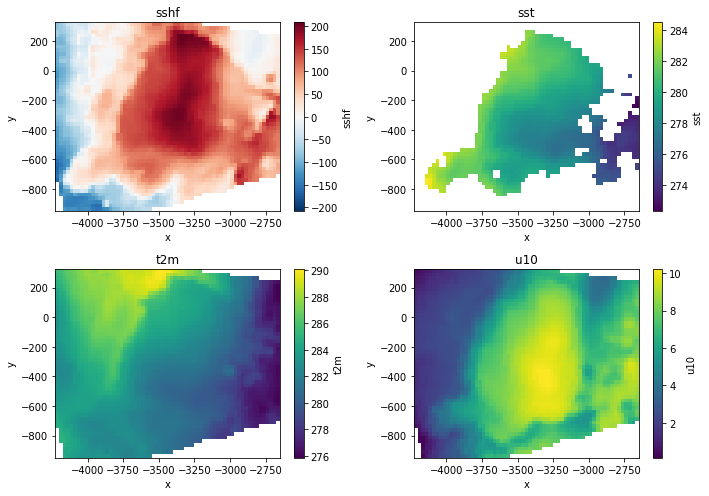

In [11]:
voi = ['sshf', 'sst', 't2m', 'u10']#, 'v10']

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

for v, ax in zip(voi, axs.flatten()):
    ds[v].isel(time=-100).plot(ax=ax)
    ax.set_title(v)

plt.tight_layout()